<a href="https://colab.research.google.com/github/anjana-psvel/Precog_Task/blob/main/sentence_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/validation.csv')
print(df)

        id                                          sentence1  \
0        1  Bradd Crellin represented BARLA Cumbria on a t...   
1        2  They were there to enjoy us and they were ther...   
2        3  After the end of the war in June 1902 , Higgin...   
3        4  From the merger of the Four Rivers Council and...   
4        5  The group toured extensively and became famous...   
...    ...                                                ...   
7995  7996  Tommy Connolly , who plays Rory Jennings , pla...   
7996  7997  Monroe Meadows , in Yosemite valley near Brida...   
7997  7998  Decipium was the isolated term for a new chemi...   
7998  7999  In 2014 the site launched iOS and Android appl...   
7999  8000  In the other direction , suppose that `` m `` ...   

                                              sentence2  label  
0     Bradd Crellin also represented BARLA Great Bri...      0  
1     They were there for us to enjoy and they were ...      1  
2     In August , after 

In [3]:
from sentence_transformers import SentenceTransformer,util
model = SentenceTransformer('all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
# Create a numpy array with sentence1 and sentence2 columns
array = df[['sentence1', 'sentence2']].to_numpy()
print(array)

[['Bradd Crellin represented BARLA Cumbria on a tour of Australia with 6 other players representing Britain , also on a tour of Australia .'
  'Bradd Crellin also represented BARLA Great Britain on a tour through Australia on a tour through Australia with 6 other players representing Cumbria .']
 ['They were there to enjoy us and they were there to pray for us .'
  'They were there for us to enjoy and they were there for us to pray .']
 ["After the end of the war in June 1902 , Higgins left Southampton in the `` SSBavarian '' in August , returning to Cape Town the following month ."
  "In August , after the end of the war in June 1902 , Higgins Southampton left the `` SSBavarian '' and returned to Cape Town the following month ."]
 ...
 ['Decipium was the isolated term for a new chemical element proposed by Marc Delafontaine from the Mineral Samarskite .'
  'Decipium was the proposed name for a new chemical element isolated from the Mineral Samarskit by Marc Delafontaine .']
 ['In 2014

In [5]:
#example
emb1 = model.encode("my name is anjana")
emb2 = model.encode("The episode was directed by Ron Rubio and wrote by Kirker Butler.")
cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[-0.0963]])


In [6]:
similarity = []
# The cosine similarity ranges from -1 to 1, where:
    # 1 indicates that the vectors are identical (i.e., have the same direction)
    # 0 indicates that the vectors are orthogonal (i.e., not correlated)
    # -1 indicates that the vectors are in opposite directions (i.e., negatively correlated)

for pair in array:
  emb1 = model.encode(pair[0])
  emb2 = model.encode(pair[1])
  similarity.append((util.cos_sim(emb1, emb2).item()+1)/2)
  # print("Cosine-Similarity:", cos_sim)
print(array[7], similarity[7])


['Most of these hotels were built along Biddle Avenue from Oak Street to Pine Street .'
 'Most of these homes were built along Biddle Avenue from Oak Street to Pine Street .'] 0.917563796043396


In [7]:
df.insert(4, "sim_score", similarity)
print(df)

        id                                          sentence1  \
0        1  Bradd Crellin represented BARLA Cumbria on a t...   
1        2  They were there to enjoy us and they were ther...   
2        3  After the end of the war in June 1902 , Higgin...   
3        4  From the merger of the Four Rivers Council and...   
4        5  The group toured extensively and became famous...   
...    ...                                                ...   
7995  7996  Tommy Connolly , who plays Rory Jennings , pla...   
7996  7997  Monroe Meadows , in Yosemite valley near Brida...   
7997  7998  Decipium was the isolated term for a new chemi...   
7998  7999  In 2014 the site launched iOS and Android appl...   
7999  8000  In the other direction , suppose that `` m `` ...   

                                              sentence2  label  sim_score  
0     Bradd Crellin also represented BARLA Great Bri...      0   0.988672  
1     They were there for us to enjoy and they were ...      1   0.

In [8]:
# Logistc Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['sim_score']]  # Input feature
y = df['label']        # Output label

# training set and testing set (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5483333333333333


In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.5383333333333333


In [10]:
# SVM
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.6045833333333334


In [15]:
arr = np.array(similarity)
mean = np.mean(arr)
std_dev = np.std(arr)

# z-score normalization
arr_normalized = (arr - mean) / std_dev

print(arr_normalized)
# range 0 to 1
min_val = np.min(arr_normalized)
max_val = np.max(arr_normalized)
final = (arr_normalized - min_val) / (max_val - min_val)

print(final)

[ 0.25514019 -0.13121118  0.2320025  ...  0.1619925   0.41408283
 -2.81335468]
[0.94358827 0.89969049 0.94095934 ... 0.9330047  0.96164756 0.59494159]


In [16]:
# prompt: avergae of final

import numpy as np
final_avg = np.mean(final)
print("Average of final:", final_avg)


Average of final: 0.9145988890203969


In [12]:
# prompt: calculate mse for teh logistci regresson model

from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.45166666666666666


In [13]:
# prompt: confusion matrix values

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


[[1316    0]
 [1084    0]]


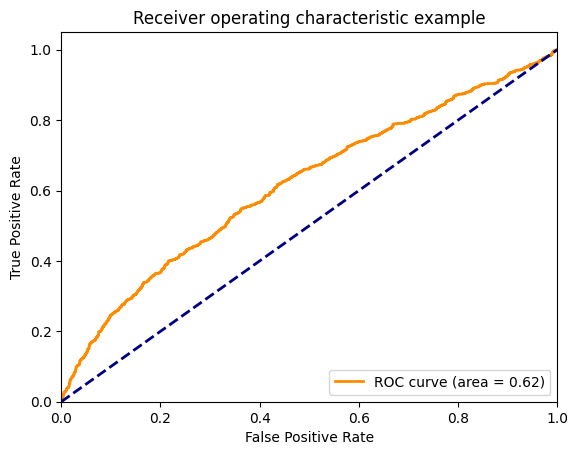

In [17]:
# prompt: roc

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probability scores
ptest = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ptest)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [18]:
# prompt: auc roc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, ptest)
roc_auc = auc(fpr, tpr)

# Print AUC
print("AUC:", roc_auc)


AUC: 0.6168334099754371
